The problem to solve here is that given a set of features that describe a house in Boston, our machine learning model must predict the house price.

To train our machine learning model with boston housing data, we will use scikit-learn’s boston dataset. We will use pandas and scikit-learn to load and explore the dataset. 

The dataset can easily be loaded from scikit-learn’s datasets module using load_boston function.

### Load Libraries

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline

In [2]:
import sklearn
from sklearn.datasets import load_boston
from sklearn.cross_validation import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import KFold

C:\Users\Sreekanth\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Sreekanth\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### Assign Constants

In [3]:
# Assign Contants user variables to tune
seed = 9
test_size = 0.20

folds   = 10
metric  = "neg_mean_squared_error"

### Boston Housing Prices Dataset

In [4]:
pd.options.display.float_format = '{:,.2f}'.format
boston_data = load_boston()

Boston is a dictionary, understanding the keys of this dictionary. There are four keys in this dataset using which we can access more information about the dataset. data, target, feature_names and DESCR are the four keys which could be accessed using keys() on the dataset variable.

In [5]:
print("[Boston Data] keys : {}".format(boston_data.keys()))

[Boston Data] keys : dict_keys(['target', 'DESCR', 'feature_names', 'data'])


There are 13 features and 1 target that are accessed using data key and target key. We can easily access the shape of features and target using shape.

In [6]:
print("[Boston Data] features shape : {}".format(boston_data.data.shape))
print("[Boston Data] target shape   : {}".format(boston_data.target.shape))

[Boston Data] features shape : (506, 13)
[Boston Data] target shape   : (506,)


The 13 column names are accessed using feature_names on the dataset which returns the unique attribute names. We can use these column names when we convert this dataset to a pandas dataframe later.

In [7]:
print("[Boston Data] feature names")
print(boston_data.feature_names)

[Boston Data] feature names
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


To know the description of each column name in this dataset, we can use DESCR to display the description of this dataset in a nutshell.

In [8]:
print("[Boston Data] dataset summary")
print(boston_data.DESCR)

[Boston Data] dataset summary
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupi

### Analyze the dataset

We can easily convert the dataset into a pandas dataframe to perform exploratory data analysis. Simply pass in the dataset.data as an argument to pd.DataFrame(). We can view the first 5 rows in the dataset using head() function.


In [9]:
df = pd.DataFrame(boston_data.data)
print("[Boston Data] df type : {}".format(type(df)))
print("[Boston Data] df shape: {}".format(df.shape))
print(df.head())

[Boston Data] df type : <class 'pandas.core.frame.DataFrame'>
[Boston Data] df shape: (506, 13)
    0     1    2    3    4    5     6    7    8      9     10     11   12
0 0.01 18.00 2.31 0.00 0.54 6.58 65.20 4.09 1.00 296.00 15.30 396.90 4.98
1 0.03  0.00 7.07 0.00 0.47 6.42 78.90 4.97 2.00 242.00 17.80 396.90 9.14
2 0.03  0.00 7.07 0.00 0.47 7.18 61.10 4.97 2.00 242.00 17.80 392.83 4.03
3 0.03  0.00 2.18 0.00 0.46 7.00 45.80 6.06 3.00 222.00 18.70 394.63 2.94
4 0.07  0.00 2.18 0.00 0.46 7.15 54.20 6.06 3.00 222.00 18.70 396.90 5.33


We can also specify the column names columns of the dataframe using feature_names instead of the indexes shown above.

In [10]:
df.columns = boston_data.feature_names
print(df.head())

   CRIM    ZN  INDUS  CHAS  NOX   RM   AGE  DIS  RAD    TAX  PTRATIO      B  \
0  0.01 18.00   2.31  0.00 0.54 6.58 65.20 4.09 1.00 296.00    15.30 396.90   
1  0.03  0.00   7.07  0.00 0.47 6.42 78.90 4.97 2.00 242.00    17.80 396.90   
2  0.03  0.00   7.07  0.00 0.47 7.18 61.10 4.97 2.00 242.00    17.80 392.83   
3  0.03  0.00   2.18  0.00 0.46 7.00 45.80 6.06 3.00 222.00    18.70 394.63   
4  0.07  0.00   2.18  0.00 0.46 7.15 54.20 6.06 3.00 222.00    18.70 396.90   

   LSTAT  
0   4.98  
1   9.14  
2   4.03  
3   2.94  
4   5.33  


We can also insert the target column in our main dataframe simply using the below code snippet.

In [11]:
df["PRICE"] = boston_data.target
print(df.head())

   CRIM    ZN  INDUS  CHAS  NOX   RM   AGE  DIS  RAD    TAX  PTRATIO      B  \
0  0.01 18.00   2.31  0.00 0.54 6.58 65.20 4.09 1.00 296.00    15.30 396.90   
1  0.03  0.00   7.07  0.00 0.47 6.42 78.90 4.97 2.00 242.00    17.80 396.90   
2  0.03  0.00   7.07  0.00 0.47 7.18 61.10 4.97 2.00 242.00    17.80 392.83   
3  0.03  0.00   2.18  0.00 0.46 7.00 45.80 6.06 3.00 222.00    18.70 394.63   
4  0.07  0.00   2.18  0.00 0.46 7.15 54.20 6.06 3.00 222.00    18.70 396.90   

   LSTAT  PRICE  
0   4.98  24.00  
1   9.14  21.60  
2   4.03  34.70  
3   2.94  33.40  
4   5.33  36.20  


We can check the datatype of each column using dtypes to make sure every column has numeric datatype. If a column has different datatype such as string or character, we need to map that column to a numeric datatype such as integer or float. For this dataset, luckily there is no such column.


In [12]:
print(df.dtypes)

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object


Now, we will understand the statistical summary of the dataset using the describe() function. Using this function, we can understand the count, min, max, mean and standard deviation for each attribute (column) in the dataset. Each of these can also be displayed individually using df.count(), df.min(), df.max(), df.median() and df.quantile(q).


In [13]:
print(df.describe())

        CRIM     ZN  INDUS   CHAS    NOX     RM    AGE    DIS    RAD    TAX  \
count 506.00 506.00 506.00 506.00 506.00 506.00 506.00 506.00 506.00 506.00   
mean    3.59  11.36  11.14   0.07   0.55   6.28  68.57   3.80   9.55 408.24   
std     8.60  23.32   6.86   0.25   0.12   0.70  28.15   2.11   8.71 168.54   
min     0.01   0.00   0.46   0.00   0.39   3.56   2.90   1.13   1.00 187.00   
25%     0.08   0.00   5.19   0.00   0.45   5.89  45.02   2.10   4.00 279.00   
50%     0.26   0.00   9.69   0.00   0.54   6.21  77.50   3.21   5.00 330.00   
75%     3.65  12.50  18.10   0.00   0.62   6.62  94.07   5.19  24.00 666.00   
max    88.98 100.00  27.74   1.00   0.87   8.78 100.00  12.13  24.00 711.00   

       PTRATIO      B  LSTAT  PRICE  
count   506.00 506.00 506.00 506.00  
mean     18.46 356.67  12.65  22.53  
std       2.16  91.29   7.14   9.20  
min      12.60   0.32   1.73   5.00  
25%      17.40 375.38   6.95  17.02  
50%      19.05 391.44  11.36  21.20  
75%      20.20 396.23 

Finding correlation between attributes is a highly useful way to check for patterns in the dataset. Pandas offers three different ways to find correlation between attributes (columns). The output of each of these correlation functions fall within the range [-1, 1].

* 1 - Positively correlated
* -1 - Negatively correlated.
* 0 - Not correlated.

We will use df.corr() function to compute the correlation between attributes and sns.heatmap() function to visualize the correlation matrix.


In [14]:
print(df.corr())

         CRIM    ZN  INDUS  CHAS   NOX    RM   AGE   DIS   RAD   TAX  PTRATIO  \
CRIM     1.00 -0.20   0.40 -0.06  0.42 -0.22  0.35 -0.38  0.62  0.58     0.29   
ZN      -0.20  1.00  -0.53 -0.04 -0.52  0.31 -0.57  0.66 -0.31 -0.31    -0.39   
INDUS    0.40 -0.53   1.00  0.06  0.76 -0.39  0.64 -0.71  0.60  0.72     0.38   
CHAS    -0.06 -0.04   0.06  1.00  0.09  0.09  0.09 -0.10 -0.01 -0.04    -0.12   
NOX      0.42 -0.52   0.76  0.09  1.00 -0.30  0.73 -0.77  0.61  0.67     0.19   
RM      -0.22  0.31  -0.39  0.09 -0.30  1.00 -0.24  0.21 -0.21 -0.29    -0.36   
AGE      0.35 -0.57   0.64  0.09  0.73 -0.24  1.00 -0.75  0.46  0.51     0.26   
DIS     -0.38  0.66  -0.71 -0.10 -0.77  0.21 -0.75  1.00 -0.49 -0.53    -0.23   
RAD      0.62 -0.31   0.60 -0.01  0.61 -0.21  0.46 -0.49  1.00  0.91     0.46   
TAX      0.58 -0.31   0.72 -0.04  0.67 -0.29  0.51 -0.53  0.91  1.00     0.46   
PTRATIO  0.29 -0.39   0.38 -0.12  0.19 -0.36  0.26 -0.23  0.46  0.46     1.00   
B       -0.38  0.18  -0.36  

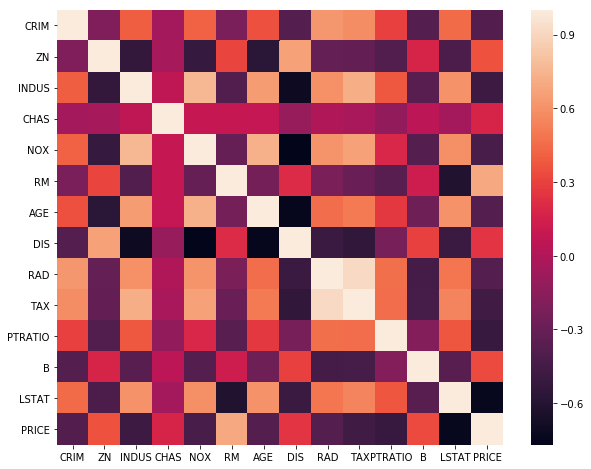

In [15]:
# correlation between attributes
plt.figure(figsize=(10,8))
sns.heatmap(df.corr())

### Visualize the dataset

#### Box Plot

A box-whisker plot is a univariate plot used to visualize a data distribution.
* The ends of whiskers are the maximum and minimum range of data distribution.
* The central line in the box is the median of the entire data distribution.
* The right and left edges in the box are the medians of data distribution to the right and left from the central median, respectively.

Understand more about box plots here.

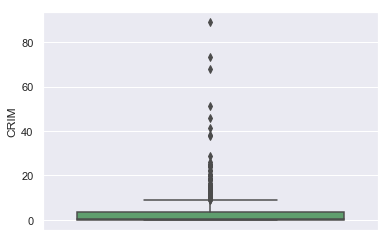

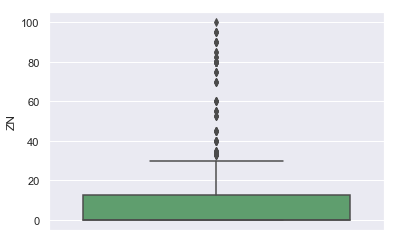

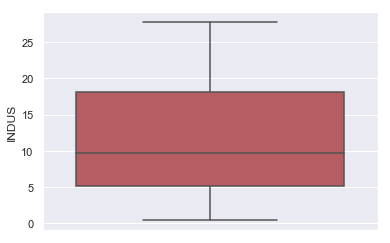

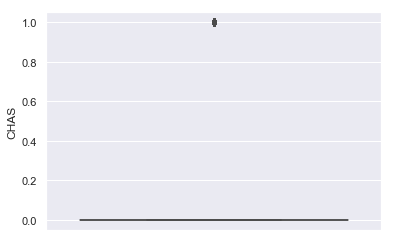

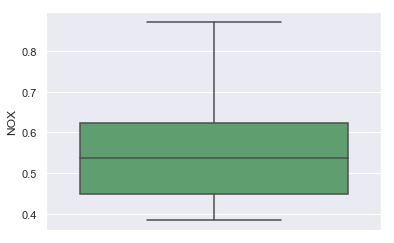

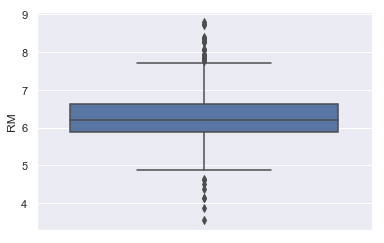

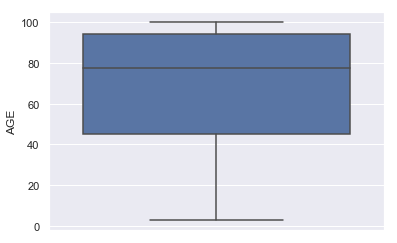

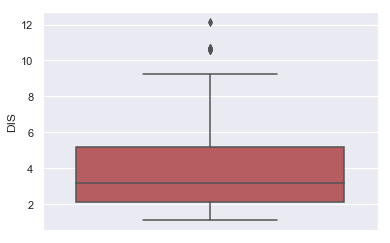

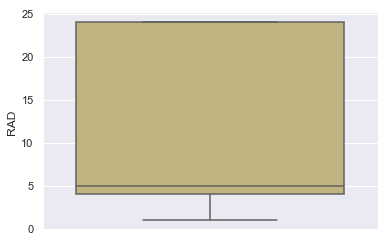

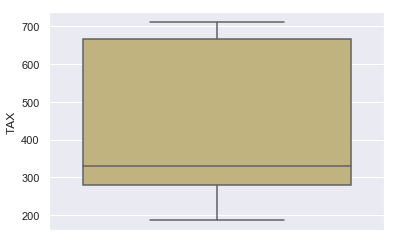

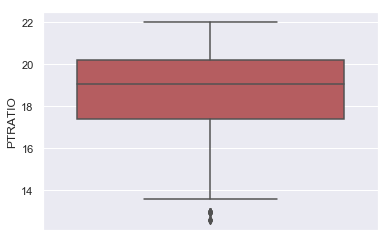

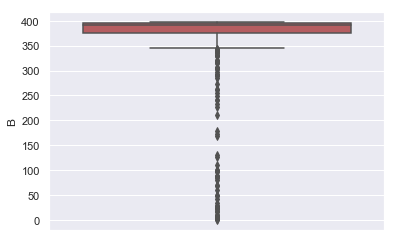

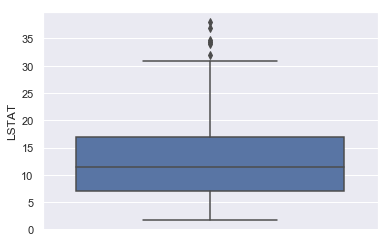

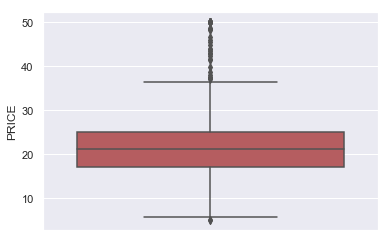

<Figure size 432x288 with 0 Axes>

In [16]:
# visualize the dataset
sns.set(color_codes=True)
colors = ["y", "b", "g", "r"]

cols = list(df.columns.values)

# draw a boxplot with vertical orientation
for i, col in enumerate(cols):
    sns.boxplot(df[col], color=random.choice(colors), orient="v")
    plt.show()
    plt.clf()
    plt.close

#### Density Plots

Density plot is another univariate plot that draws a histogram of the data distribution and fits a Kernel Density Estimate (KDE).

A histogram is a graphical representation of a frequency distribution where data points are organized as bins, plotted with values along the x-axis and the count of data points in each bin along the y-axis.

A Kernel Density Plot shows a smooth representation of the data points.

C:\Users\Sreekanth\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


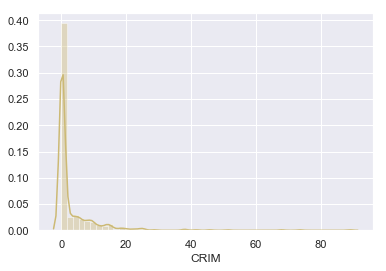

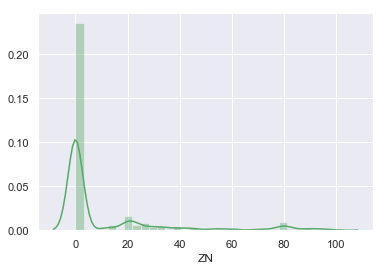

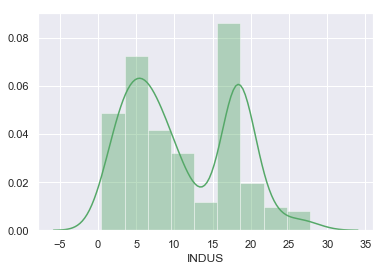

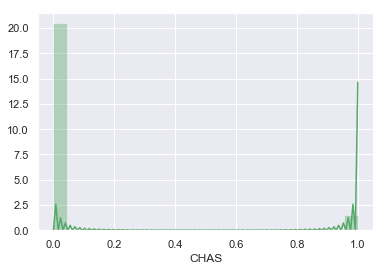

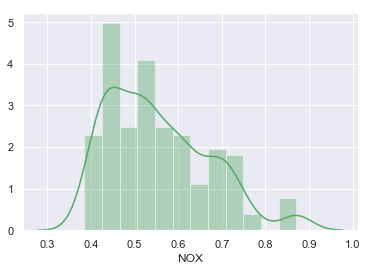

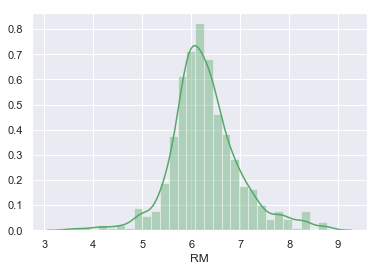

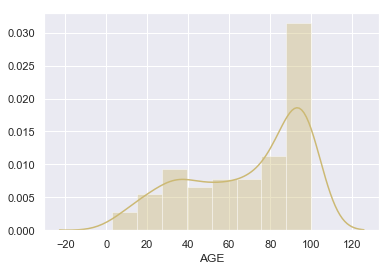

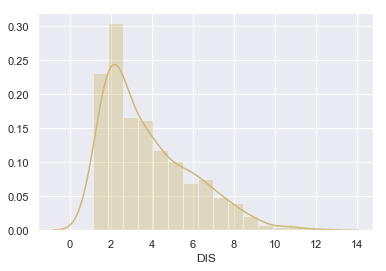

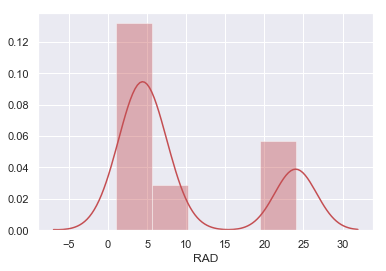

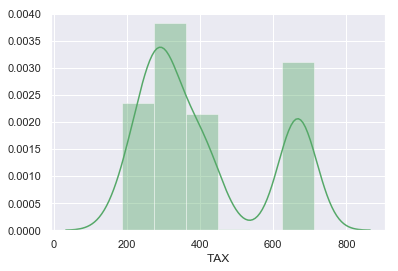

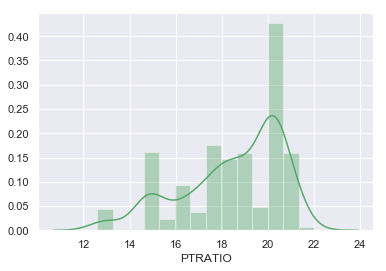

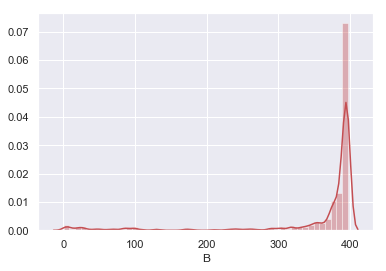

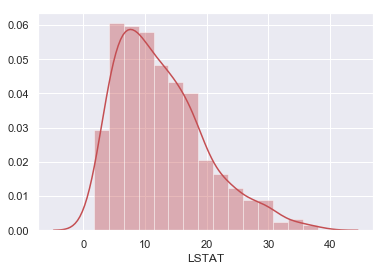

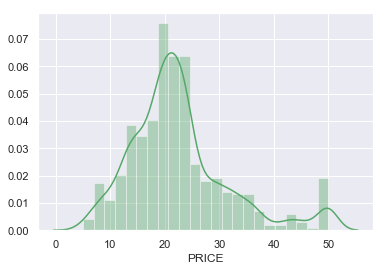

In [17]:
# draw a histogram and fit a kernel density estimate (KDE)
for i, col in enumerate(cols):
	sns.distplot(df[col], color=random.choice(colors))
	plt.show()
	plt.clf()
	plt.close()

Using the density plots, we can see that CRIM, AGE, B and ZN have exponential distribution. NOX, RM and LSTAT is probably having a skewed gaussian distribution. Also, we could notice that RAD and TAX have bimodal distribution.

### Scatter plots

Scatter plot is used to understand relationship between two different attributes in the dataset. Below we have compared PRICE (target) vs each of the attribute in the dataset.

C:\Users\Sreekanth\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


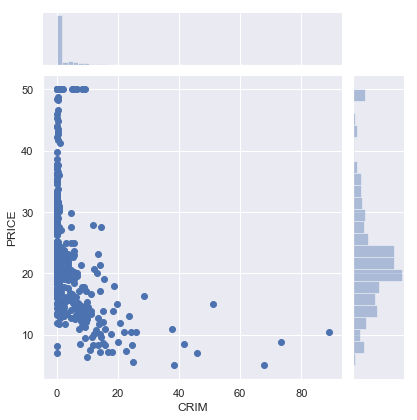

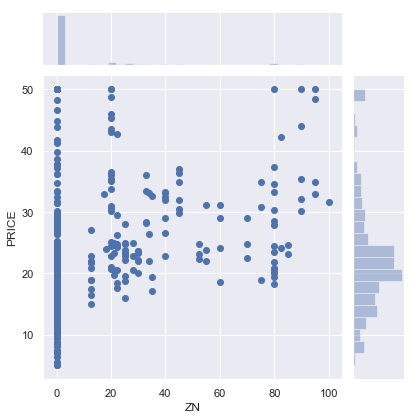

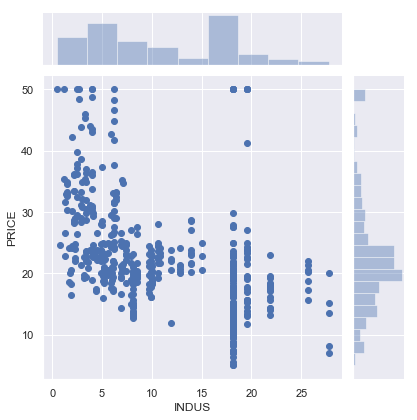

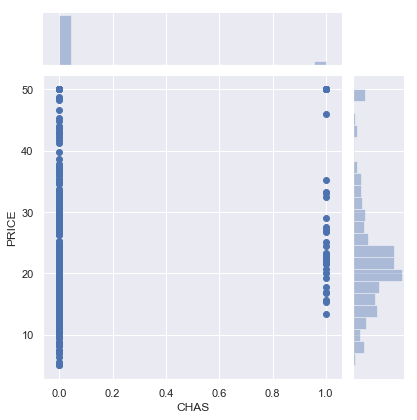

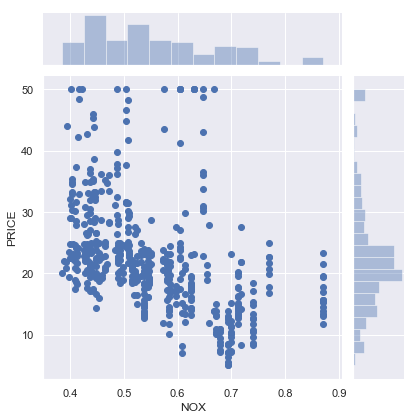

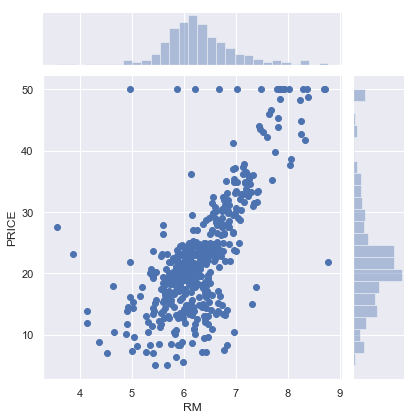

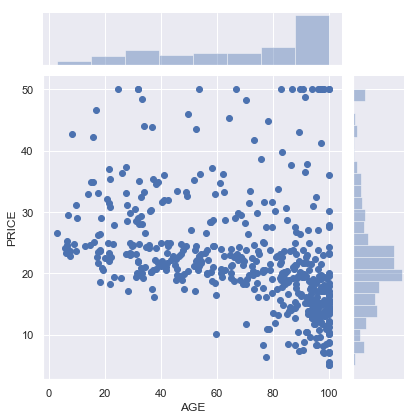

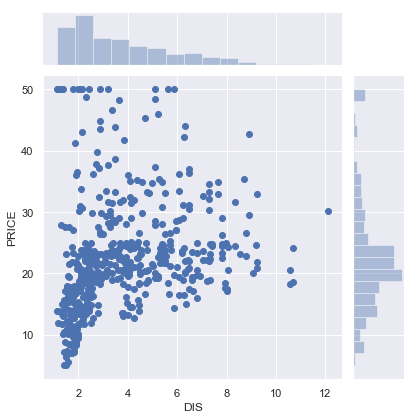

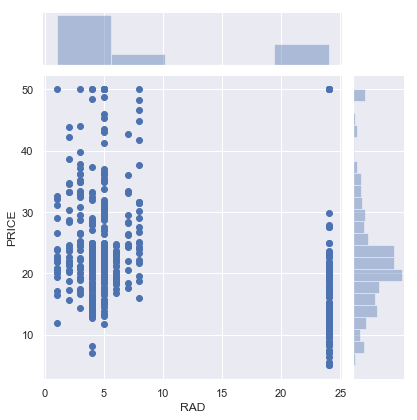

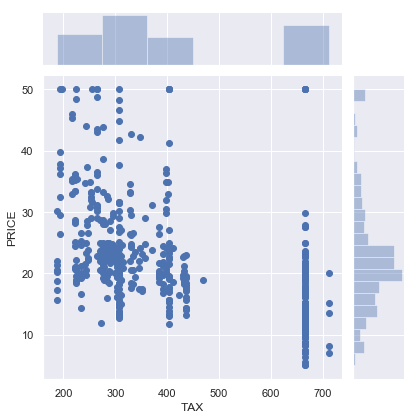

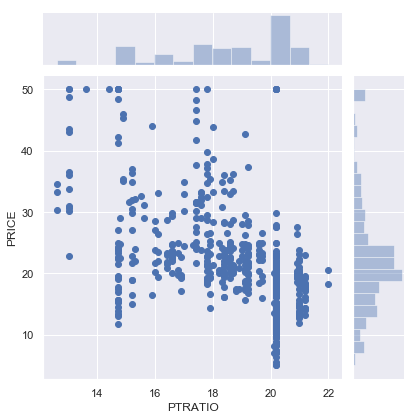

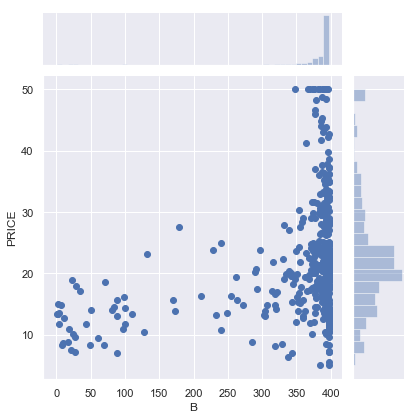

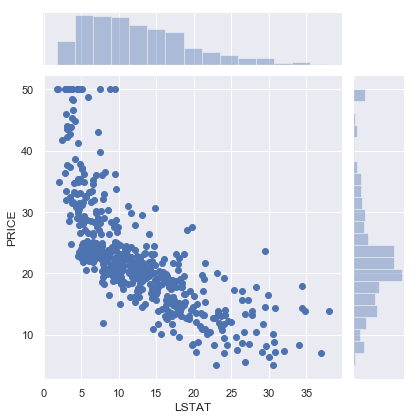

In [18]:
# bivariate plot between target and reason of absence
for i, col in enumerate(cols):
	if (i == len(cols) - 1):
		pass
	else: 
		sns.jointplot(x=col, y="PRICE", data=df);
		plt.show()
		plt.clf()
		plt.close()

We see a lot of structure in this dataset with outliers and different data distributions. Two key take aways from these visualizations are

* Data is not standardized (meaning there are different data distributions).
* Data is not normalized (meaning there are differing scales of data).


### Training regression models

* In this exercise, we will try Random Forest Regression model available in scikit-learn with a 10-fold cross validation method.


* We split the training data into train and test data using a test_size parameter for 10-folds. Each fold will have different samples that are not present in other folds. By this way, we can throughly train our model on different samples in the dataset.


* Before doing anything, we will split our boston housing prices dataframe df into features X and target Y.

In [19]:
X = df.drop("PRICE", axis=1)
y = df["PRICE"]
print(X.shape)
print(y.shape)

(506, 13)
(506,)


As we see different data distributions, we will standardize the dataset using StandardScaler function in scikit-learn. This is a useful technique where the attributes are transformed to a standard gaussian distribution with a mean of 0 and a standard deviation of 1.


In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
scaled_X = scaler.transform(X)

Now, we will split the data into train and test set. We can easily do this using scikit-learn’s train_test_split() function using a test_size parameter.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = test_size, random_state = seed)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


We will use Random Forest regression model offered by scikit-learn for this problem. We will use the MSE (Mean Squared Error) as the performance metric for the regression model.

### RandomForestRegressor

In [22]:
# hold model ina variable. This can be extended to include different regressors later.
models = {}
models["RandomForest"]  = RandomForestRegressor()

# 10-fold cross validation for each model
model_results = []
model_names   = []

for model_name in models:
	model   = models[model_name]
	k_fold  = KFold(n_splits = folds, random_state=seed)
	results = cross_val_score(model, X_train, y_train, cv = k_fold, scoring = metric)
	
	model_results.append(results)
	model_names.append(model_name)
	print("{}Regressor :  Mean {}, Standard Deviation {}".format(model_name, round(results.mean(), 3), round(results.std(), 3)))

RandomForestRegressor :  Mean -13.829, Standard Deviation 6.448


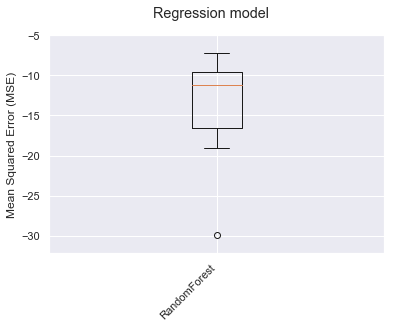

In [23]:
# box-whisker plot to display the MSE
figure = plt.figure()
figure.suptitle('Regression model')
axis = figure.add_subplot(111)
plt.boxplot(model_results)

axis.set_xticklabels(model_names, rotation = 45, ha="right")
axis.set_ylabel("Mean Squared Error (MSE)")
plt.margins(0.05, 0.1)
plt.show()

Create the Regression Model (RandomForestRegressor)

In [24]:
# create and fit the regression model
rf_model = RandomForestRegressor(random_state=seed)
rf_model.fit(X_train, y_train)

# make predictions using the model
y_pred = rf_model.predict(X_test)
print("[Boston Dataset] MSE : {}".format(round(mean_squared_error(y_test, y_pred), 3)))

[Boston Dataset] MSE : 12.228


RandomForest Regression model achieved an impressive mean squared error of 12.228 which means our model is able to predict correct values on test data with MSE of 12.2.

#### Use scatter plot to display the Actual vs Predicted Values.

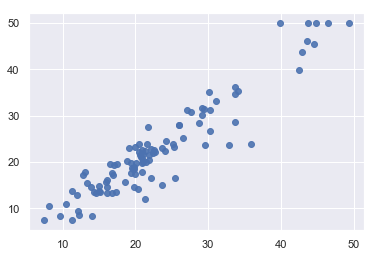

In [25]:
plt.scatter(y_pred, y_test, alpha = 0.9)
plt.show()